In [1]:
import sys
import os
%matplotlib inline
sys.path.append(os.path.abspath('../src'))
from model_training import train_model, get_untrained_custom_model, plot_training_history
from utils import save_model, load_data, test_gpu

2024-07-09 10:38:45.476303: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#making sure the gpu is available
test_gpu()

Num GPUs Available:  1


2024-07-09 10:38:47.636830: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-09 10:38:48.554491: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 10:38:48.554566: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-09 10:38:48.554591: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-09 10:38:48.559573: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-09 10:38:48.559737: I tensorflow/str

In [3]:
train_data_path = '../datasets/ready/train/'
val_data_path = '../datasets/ready/val/'

#loading the datasets
x_train = load_data(train_data_path+"x_train.csv")
y_train = load_data(train_data_path+"y_train.csv")
x_val = load_data(val_data_path+"/x_val.csv")
y_val = load_data(val_data_path+"/y_val.csv")

In [4]:
save_path = '../models'
# Setting up hyperparameters
batch_size = 128
epochs = 128

optimizer='adam'
loss='binary_crossentropy' 
metrics=['accuracy']

In [5]:
# Getting the model
model = get_untrained_custom_model(optimizer=optimizer, loss=loss, metrics=metrics, x_train=x_train)

2024-07-09 10:38:48.752217: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 10:38:48.756958: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-09 10:38:48.757034: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-09 10:38:48.757240: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

In [6]:
#traingin the random forest model 
history = train_model(model, x_train, y_train, epochs, x_val, y_val, batch_size)

2024-07-09 10:38:49.875962: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-09 10:38:49.876746: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496000000 Hz


Epoch 1/128


2024-07-09 10:38:50.248263: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


5/5 [==============================] - 2s 40ms/step - loss: 2.3430 - accuracy: 0.5075 - val_loss: 0.8752 - val_accuracy: 0.4101
Epoch 2/128
1/5 [=====>........................] - ETA: 0s - loss: 1.6268 - accuracy: 0.5078

2024-07-09 10:38:51.804204: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-07-09 10:38:51.804348: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


5/5 [==============================] - 0s 13ms/step - loss: 2.1547 - accuracy: 0.4813 - val_loss: 1.0280 - val_accuracy: 0.4101
Epoch 3/128
5/5 [==============================] - 0s 15ms/step - loss: 2.1557 - accuracy: 0.4625 - val_loss: 1.0107 - val_accuracy: 0.4101
Epoch 4/128
5/5 [==============================] - 0s 10ms/step - loss: 1.8691 - accuracy: 0.4963 - val_loss: 0.8667 - val_accuracy: 0.4101
Epoch 5/128
5/5 [==============================] - 0s 12ms/step - loss: 2.0101 - accuracy: 0.5112 - val_loss: 0.6972 - val_accuracy: 0.6236
Epoch 6/128
5/5 [==============================] - 0s 12ms/step - loss: 1.7397 - accuracy: 0.5674 - val_loss: 0.7058 - val_accuracy: 0.6236
Epoch 7/128
5/5 [==============================] - 0s 11ms/step - loss: 1.4404 - accuracy: 0.5262 - val_loss: 0.6981 - val_accuracy: 0.6348
Epoch 8/128
5/5 [==============================] - 0s 11ms/step - loss: 1.4223 - accuracy: 0.5375 - val_loss: 0.7839 - val_accuracy: 0.4157
Epoch 9/128
5/5 [===============

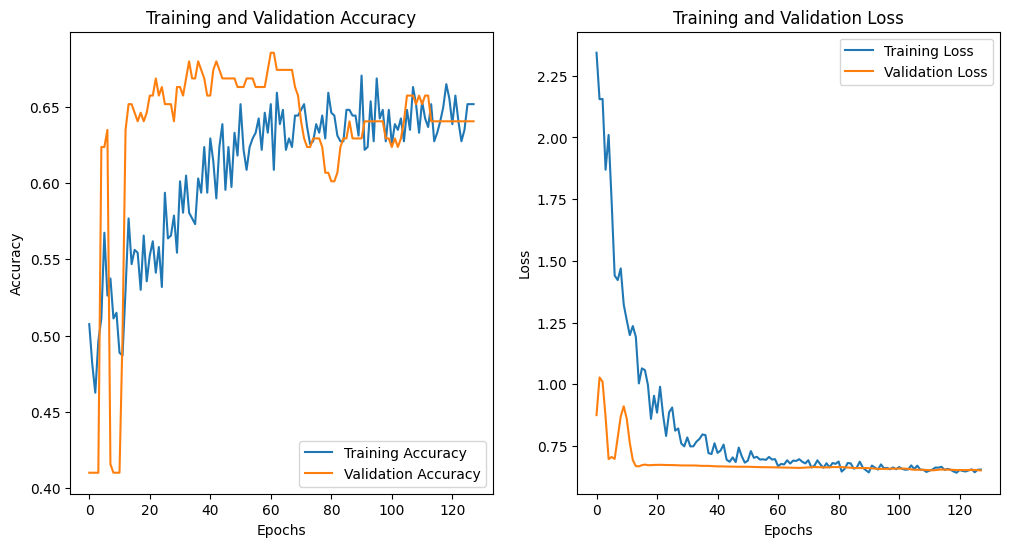

In [7]:
# Get predictions on the training data
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-07-09 10:38:59.470475: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
